# Imports

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
DATA_PATH = "../data"
df_train = pd.read_csv(f"{DATA_PATH}/train_preprocessed.csv")
df_test = pd.read_csv(f"{DATA_PATH}/test.csv")

In [3]:
NOT_COUNTRIES = ["World", "Asia", "European Union", "Africa", "North America", "South America", "Oceania"]

# Histogram

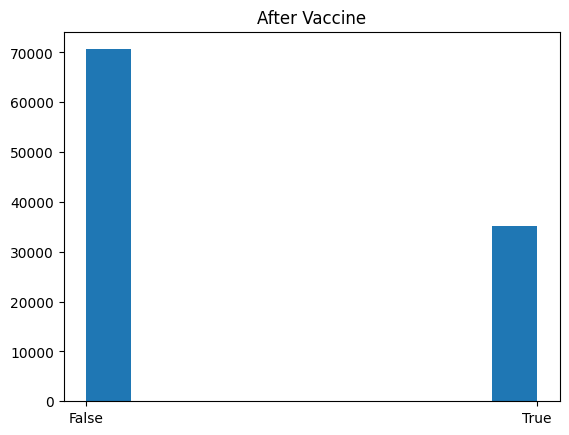

In [4]:
plt.hist(df_train["After Vaccine"].astype(str))
plt.title("After Vaccine")
plt.show()

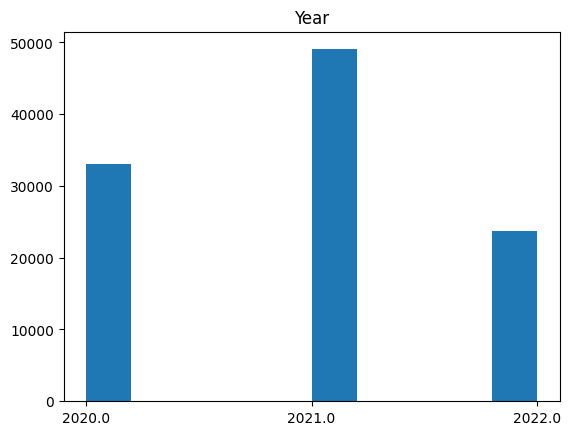

In [5]:
plt.hist(df_train["Year"].astype(str))
plt.title("Year")
plt.show()

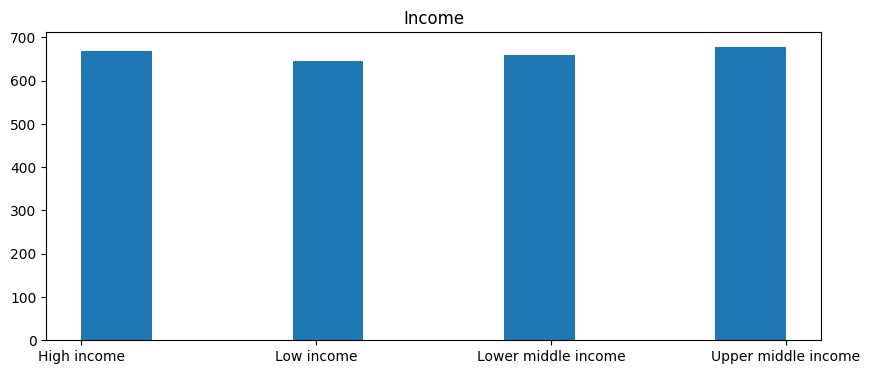

In [6]:
legend = ['Low income', 'Lower middle income', 'Upper middle income', 'High income']
df = df_train.copy()
df["Income"] = df_train["Income"].apply(lambda x: x if pd.isna(x) else legend[int(x-1)])
plt.figure(figsize=(10, 4))
plt.hist(df["Income"].dropna().astype(str))
plt.title("Income")
plt.show()

# Barplot

In [7]:
def create_barplot(y:str, x:str="Year") -> None:
    _, ax = plt.subplots(figsize=(10,4))
    sns.barplot(data=df_train.loc[df_train["Location"]=="World"], x=x, y=y, saturation=1, edgecolor='white')
    sns.despine()
    ax.get_legend()
    plt.title(f"{y} by {x} Worldwise")
    plt.show()

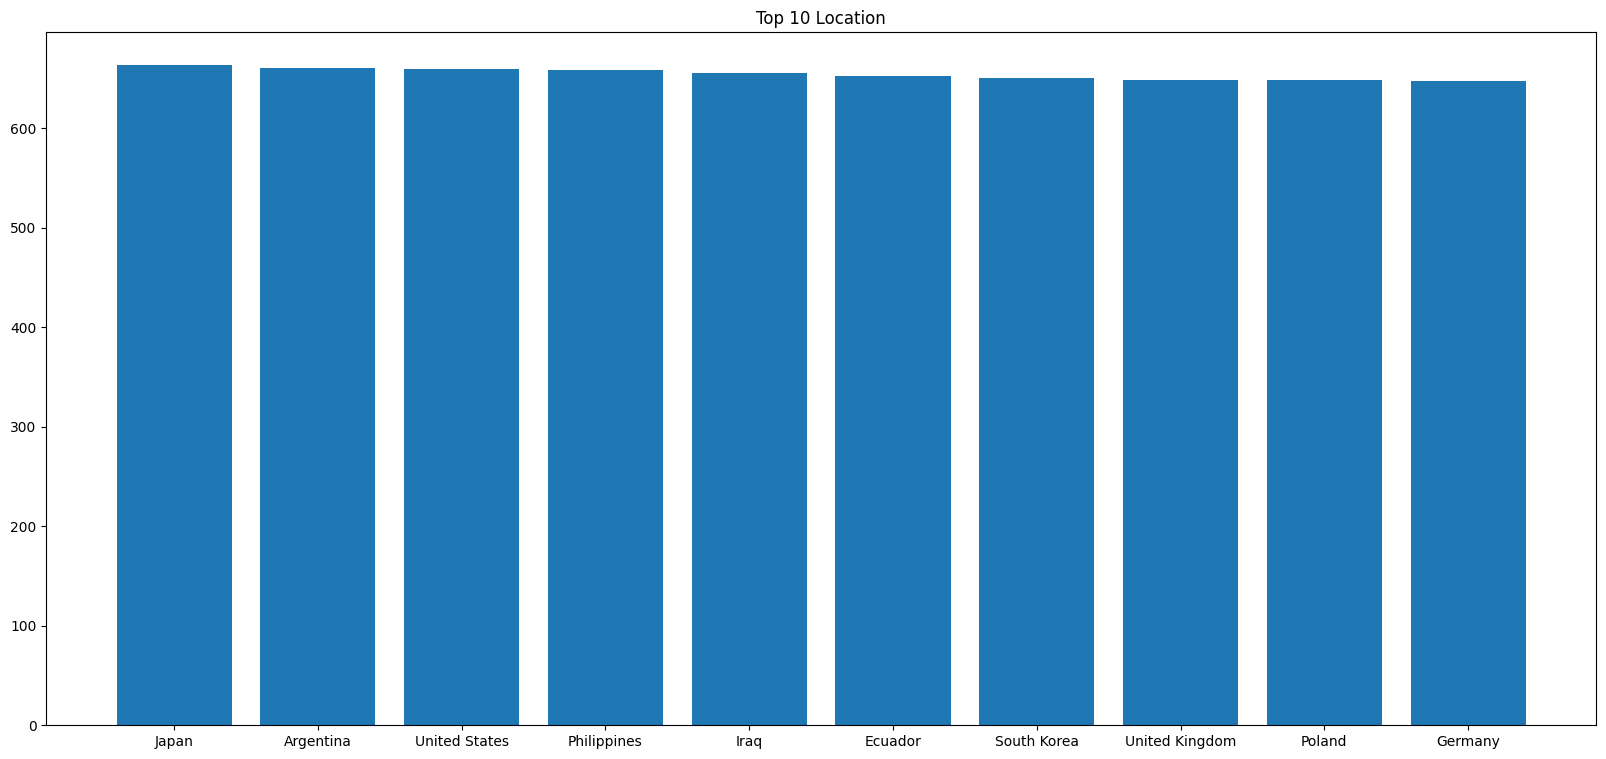

In [8]:
location_counts = list(df_train["Location"].dropna().astype(str).value_counts().to_dict().items())
location_counts = [it for it in location_counts if it[0] not in NOT_COUNTRIES]
bin_num = 10
plt.figure(figsize=(20,9))
plt.bar([it[0] for it in location_counts[:bin_num]], [it[1] for it in location_counts[:bin_num]])
plt.title(f"Top {bin_num} Location")
plt.show()

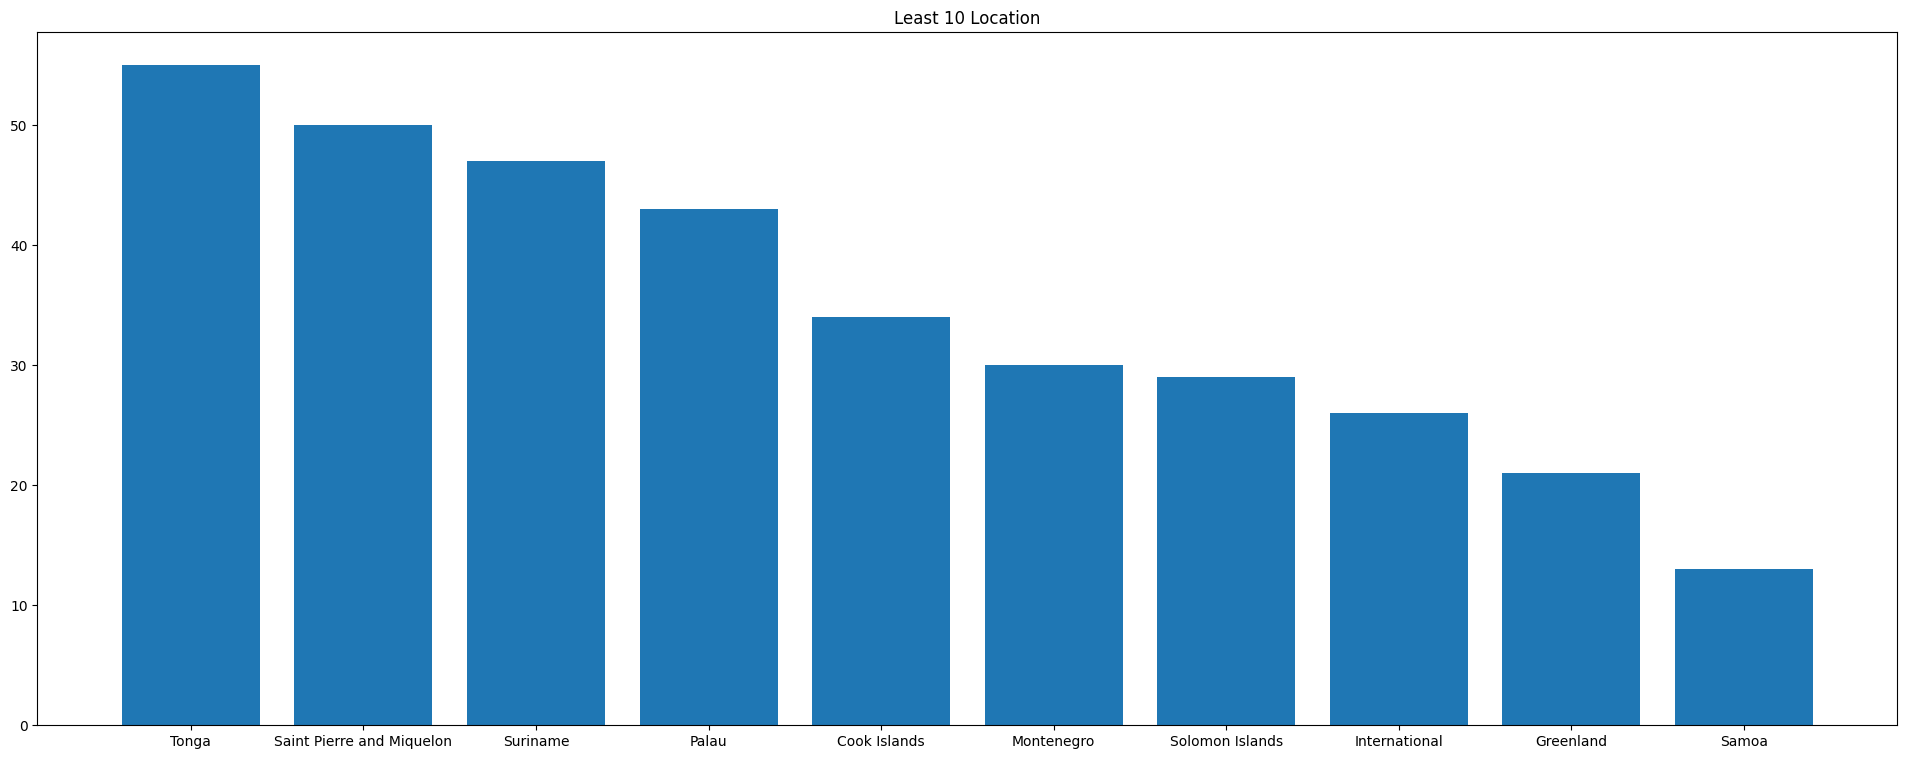

In [9]:
plt.figure(figsize=(24,9))
plt.bar([it[0] for it in location_counts[len(location_counts) - bin_num:]], [it[1] for it in location_counts[len(location_counts) -bin_num : ]])
plt.title(f"Least {bin_num} Location")
plt.show()

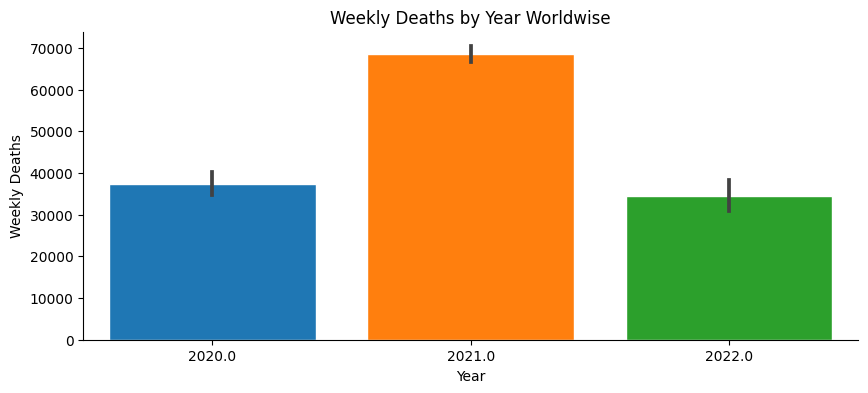

In [10]:
create_barplot("Weekly Deaths")

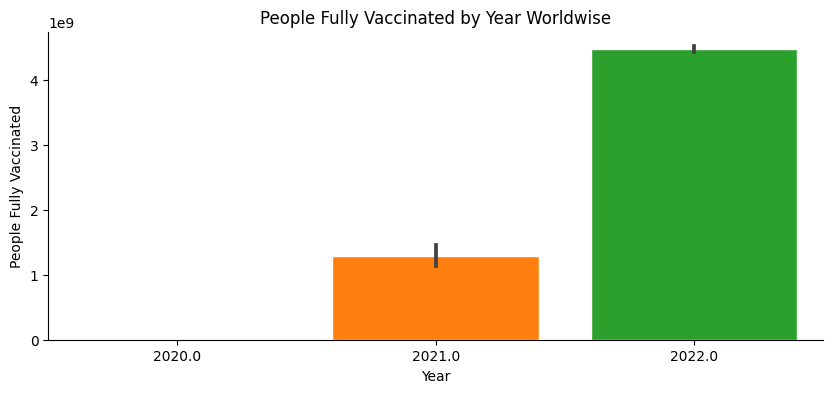

In [11]:
create_barplot("People Fully Vaccinated")

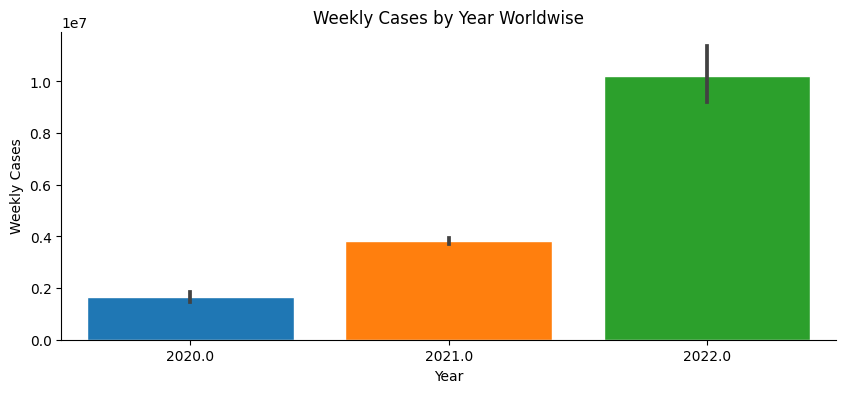

In [12]:
create_barplot("Weekly Cases")

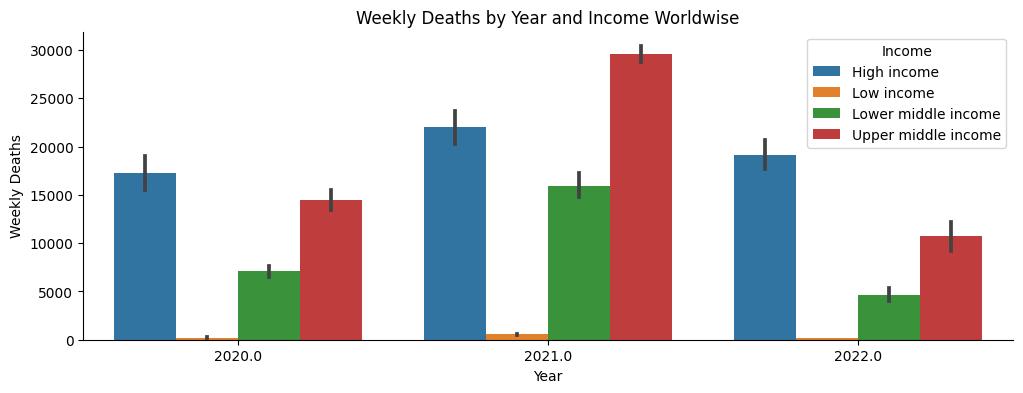

In [13]:
legend = ['Low income', 'Lower middle income', 'Upper middle income', 'High income']
df = df_train.copy()
df["Income"] = df_train["Income"].apply(lambda x: x if pd.isna(x) else legend[int(x-1)])
_, ax = plt.subplots(figsize=(12,4))
sns.barplot(data=df.dropna(subset=["Income"]), x="Year", y="Weekly Deaths", hue="Income")
sns.despine()
plt.title("Weekly Deaths by Year and Income Worldwise")
plt.show()

# Boxplot

In [14]:
def create_boxplot(y:str, x:str="Year", worldwise:bool=True) -> None:
    _, ax = plt.subplots(figsize=(16,4))
    if worldwise:
        sns.boxplot(data=df_train.loc[df_train["Location"]=="World"], x=x, y=y)
        plt.title(f"{y} by {x} Worldwise")
    else:
        top_locations = list(df_train.loc[~df_train["Location"].isin(NOT_COUNTRIES)]["Location"].dropna().astype(str).value_counts().to_dict().keys())
        bin_num = 10
        sns.boxplot(data=df_train.loc[df_train["Location"].isin(top_locations[:bin_num])], x="Location", y=y)
        plt.title(f"{y} by Most Common Countries")
    sns.despine()
    ax.get_legend()
    plt.show()

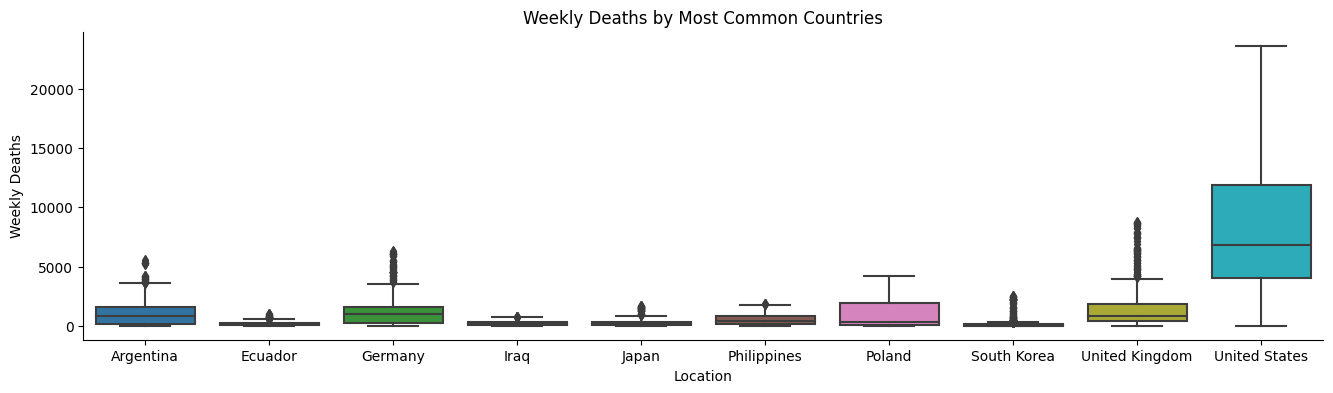

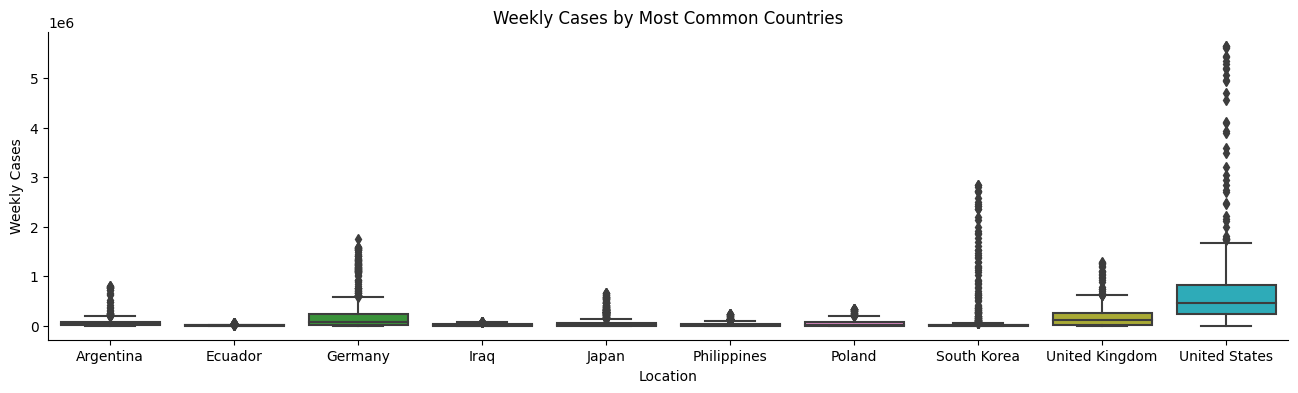

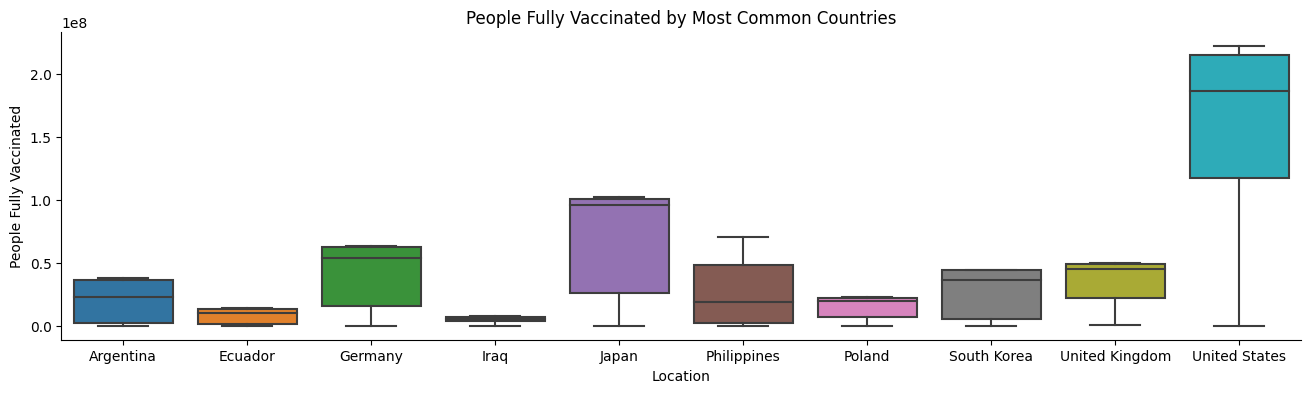

In [15]:
columns = ["Weekly Deaths", "Weekly Cases", "People Fully Vaccinated"]
for col in columns:
    create_boxplot(col, worldwise=False)

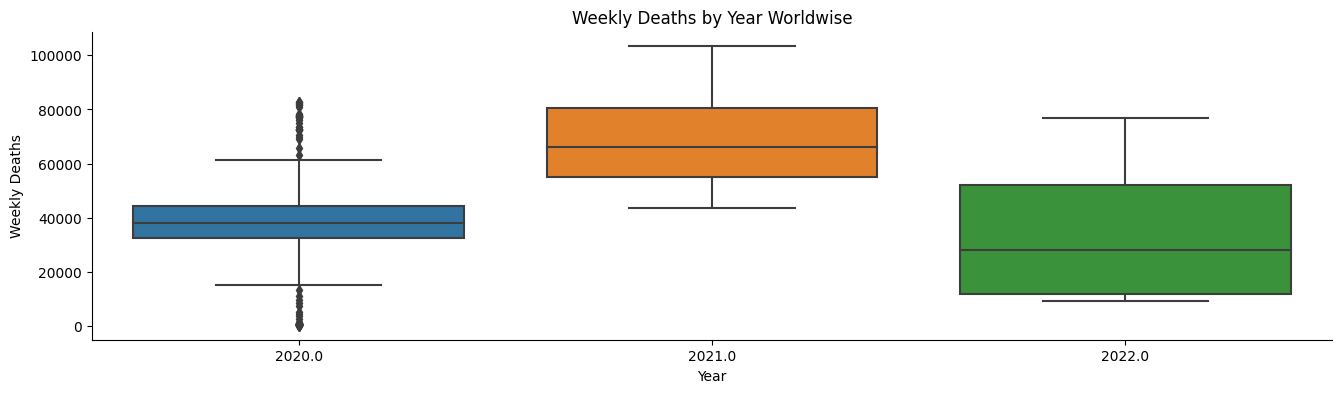

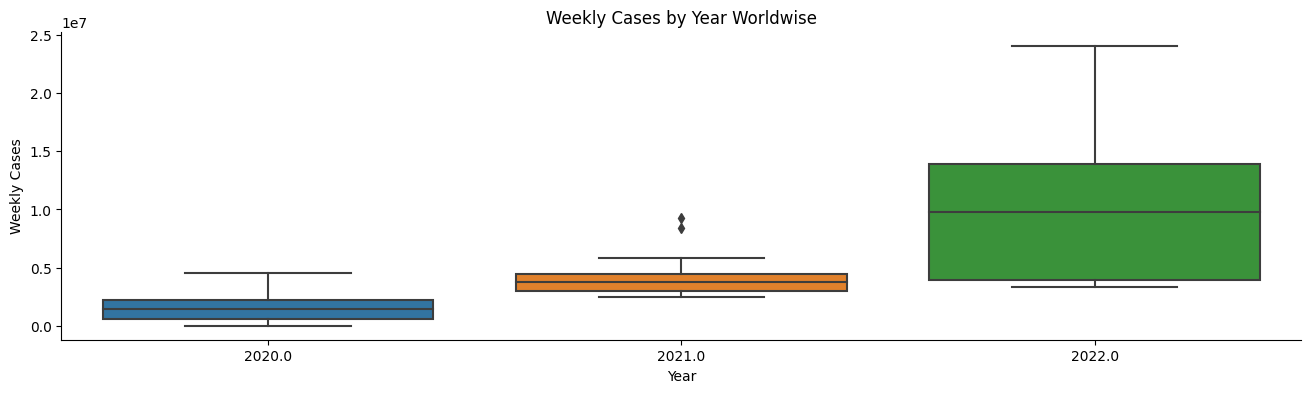

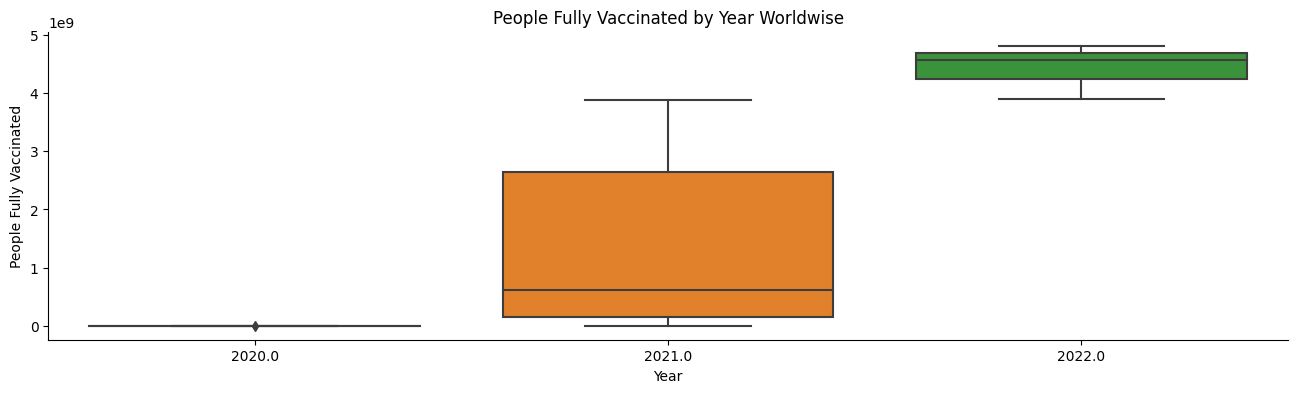

In [16]:
columns = ["Weekly Deaths", "Weekly Cases", "People Fully Vaccinated"]
for col in columns:
    create_boxplot(col)

In [17]:
df_train.columns

Index(['Unnamed: 0', 'Location', 'Weekly Cases', 'Year',
       'Weekly Cases per Million', 'Weekly Deaths',
       'Weekly Deaths per Million', 'Next Week's Deaths', 'Total Vaccinations',
       'People Vaccinated', 'People Fully Vaccinated', 'Total Boosters',
       'Daily Vaccinations', 'Total Vaccinations per Hundred',
       'People Vaccinated per Hundred', 'People Fully Vaccinated per Hundred',
       'Total Boosters per Hundred', 'Daily Vaccinations per Hundred',
       'Daily People Vaccinated', 'Daily People Vaccinated per Hundred',
       'Income', 'After Vaccine'],
      dtype='object')

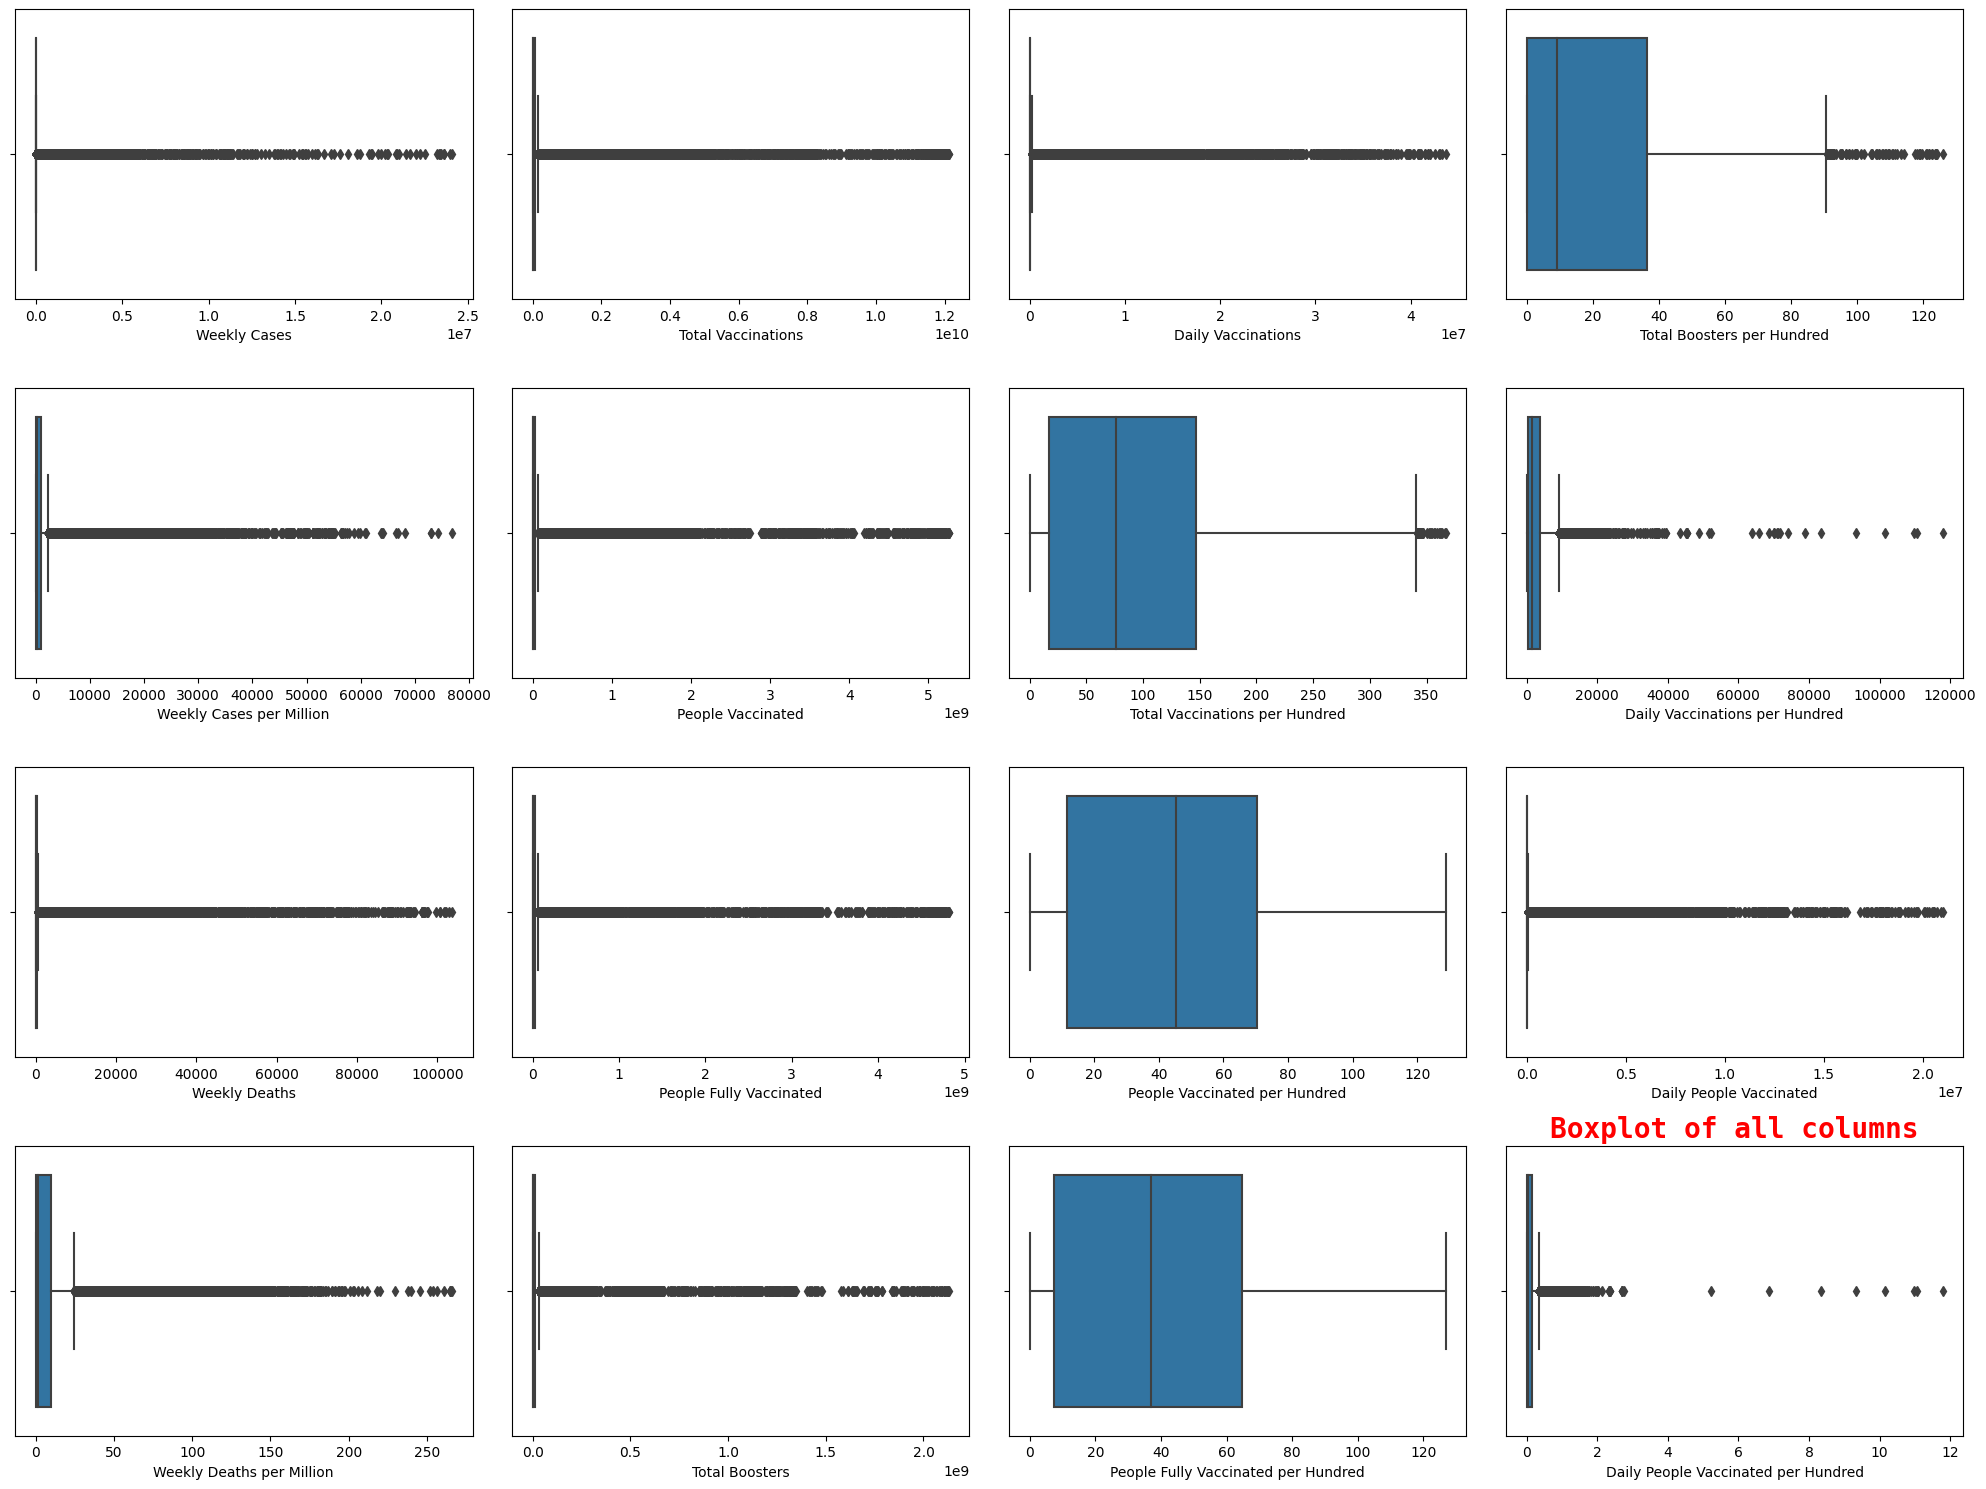

In [33]:
wanted_cols = ['Weekly Cases', 'Weekly Cases per Million', 'Weekly Deaths',
               'Weekly Deaths per Million', 'Total Vaccinations',
                'People Vaccinated', 'People Fully Vaccinated', 'Total Boosters',
                'Daily Vaccinations', 'Total Vaccinations per Hundred',
                'People Vaccinated per Hundred', 'People Fully Vaccinated per Hundred',
                'Total Boosters per Hundred', 'Daily Vaccinations per Hundred',
                'Daily People Vaccinated', 'Daily People Vaccinated per Hundred']
grid_size = 4
fig, ax = plt.subplots(grid_size, grid_size, figsize=(20, 15))
i, j = 0, 0
for col in wanted_cols:
    sns.boxplot(x=df_train[col].dropna(), ax=ax[i][j])
    i += 1
    if i % grid_size == 0:
        j += 1
        i = 0
fig.tight_layout()
plt.show()

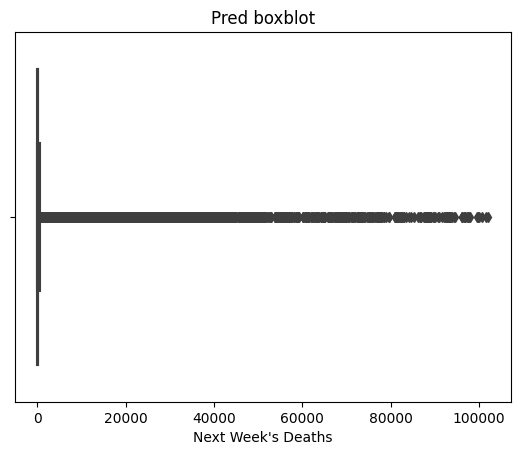

In [34]:
sns.boxplot(x=df_train["Next Week's Deaths"].dropna())
plt.title("Pred boxblot")
plt.show()

# Plot

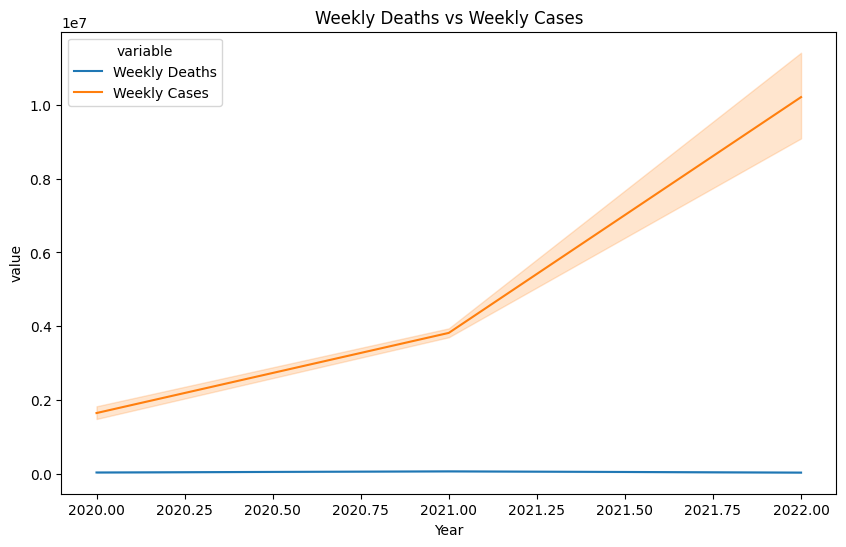

In [19]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=pd.melt(df_train.loc[df_train["Location"] == "World"][["Weekly Deaths", "Year", "Weekly Cases"]], ['Year']), x="Year", y='value', hue='variable')
plt.title("Weekly Deaths vs Weekly Cases")
plt.show()

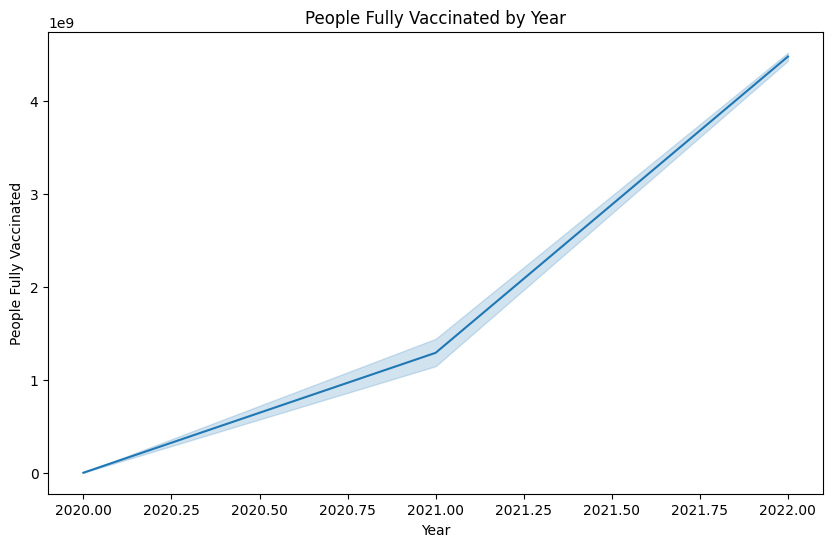

In [20]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_train.loc[df_train["Location"] == "World"], x="Year", y="People Fully Vaccinated")
plt.title("People Fully Vaccinated by Year")
plt.show()